In [5]:
import pandas as pd

# Load the datasets
content_df = pd.read_csv('Content.csv')
reactions_df = pd.read_csv('Reactions.csv')
reaction_types_df = pd.read_csv('ReactionTypes.csv')

# Display the first few rows of each dataframe to understand their structure
content_df.head(), reactions_df.head(), reaction_types_df.head()

# Clean the Content dataset
# Remove rows with missing values
content_df_cleaned = content_df.dropna()

# Remove columns that are not relevant
content_df_cleaned = content_df_cleaned.drop(columns=['Unnamed: 0'])

# Clean the Reactions dataset
# Remove rows with missing values
reactions_df_cleaned = reactions_df.dropna()

# Remove columns that are not relevant
reactions_df_cleaned = reactions_df_cleaned.drop(columns=['Unnamed: 0'])

# Convert the Datetime column to datetime format
reactions_df_cleaned['Datetime'] = pd.to_datetime(reactions_df_cleaned['Datetime'])

# Clean the ReactionTypes dataset
# Remove rows with missing values
reaction_types_df_cleaned = reaction_types_df.dropna()

# Remove columns that are not relevant
reaction_types_df_cleaned = reaction_types_df_cleaned.drop(columns=['Unnamed: 0'])

# Function to display the cleaned dataframes to the user
def display_dataframe_to_user(name, dataframe):
    dataframe.to_csv(f"{name}.csv", index=False)

# Display cleaned dataframes to the user
display_dataframe_to_user("Cleaned_Content_Data", content_df_cleaned)
display_dataframe_to_user("Cleaned_Reactions_Data", reactions_df_cleaned)
display_dataframe_to_user("Cleaned_Reaction_Types_Data", reaction_types_df_cleaned)

content_df_cleaned.head(), reactions_df_cleaned.head(), reaction_types_df_cleaned.head()

(                             Content ID                               User ID  \
 0  97522e57-d9ab-4bd6-97bf-c24d952602d2  8d3cd87d-8a31-4935-9a4f-b319bfe05f31   
 1  9f737e0a-3cdd-4d29-9d24-753f4e3be810  beb1f34e-7870-46d6-9fc7-2e12eb83ce43   
 2  230c4e4d-70c3-461d-b42c-ec09396efb3f  a5c65404-5894-4b87-82f2-d787cbee86b4   
 3  356fff80-da4d-4785-9f43-bc1261031dc6  9fb4ce88-fac1-406c-8544-1a899cee7aaf   
 4  01ab84dd-6364-4236-abbb-3f237db77180  e206e31b-5f85-4964-b6ea-d7ee5324def1   
 
     Type        Category                                                URL  
 0  photo        Studying  https://socialbuzz.cdn.com/content/storage/975...  
 1  photo  healthy eating  https://socialbuzz.cdn.com/content/storage/9f7...  
 2  photo  healthy eating  https://socialbuzz.cdn.com/content/storage/230...  
 3  photo      technology  https://socialbuzz.cdn.com/content/storage/356...  
 4  video            food  https://socialbuzz.cdn.com/content/storage/01a...  ,
                              C

In [9]:
# Merge the dataframes together
merged_df = reactions_df.merge(content_df[['Content ID', 'Category']], on='Content ID', how='left')
merged_df = merged_df.merge(reaction_types_df[['Type', 'Score']], on='Type', how='left')

# Display the first few rows of the merged dataframe
merged_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime,Category,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15,Studying,NaN
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,Studying,0.0
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,Studying,10.0
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,Studying,15.0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,Studying,0.0


In [10]:
# Calculate the total scores for each category
category_scores = merged_df.groupby('Category')['Score'].sum().reset_index()

# Sort the categories by total score in descending order and get the top 5
top_5_categories = category_scores.sort_values(by='Score', ascending=False).head(5)

# Display the top 5 categories
top_5_categories

,Category,Score
25,animals,69548.0
32,healthy eating,69067.0
37,technology,67472.0
34,science,66043.0
26,cooking,63982.0


In [14]:
# Save the cleaned dataset and the top 5 categories to a new file
cleaned_and_top5_df = merged_df.copy()

# Add a column indicating if the category is in the top 5
cleaned_and_top5_df['Top 5 Category'] = cleaned_and_top5_df['Category'].apply(lambda x: x if x in top_5_categories['Category'].values else 'Other')

# Save to CSV
output_file = 'Cleaned_and_Top5_Categories.csv'
cleaned_and_top5_df.to_csv(output_file, index=False)


output_file

'Cleaned_and_Top5_Categories.csv'

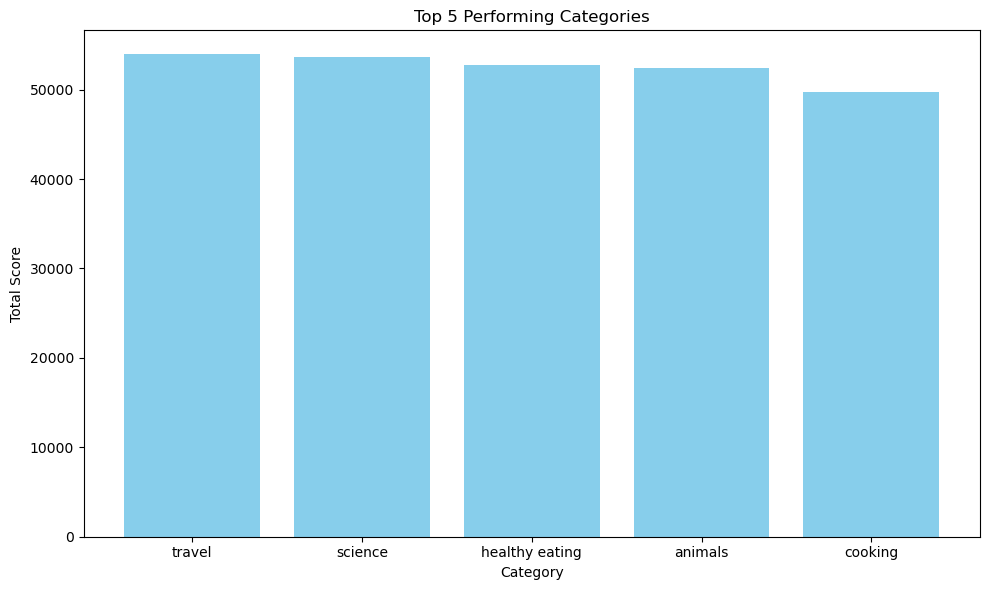

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the datasets
reactions_df = pd.read_csv('Cleaned_Reactions_Data.csv')
reaction_types_df = pd.read_csv('Cleaned_Reaction_Types_Data.csv')
content_df = pd.read_csv('Cleaned_Content_Data.csv')

# Merge the dataframes together
merged_df = reactions_df.merge(content_df[['Content ID', 'Category']], on='Content ID', how='left')
merged_df = merged_df.merge(reaction_types_df[['Type', 'Score']], on='Type', how='left')

# Calculate the total scores for each category
category_scores = merged_df.groupby('Category')['Score'].sum().reset_index()

# Sort the categories by total score in descending order and get the top 5
top_5_categories = category_scores.sort_values(by='Score', ascending=False).head(5)

# Create bar plot for the top 5 categories
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories['Category'], top_5_categories['Score'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Score')
plt.title('Top 5 Performing Categories')
plt.tight_layout()
plt.show()